### 代码模拟梯度下降的思想

In [1]:
import matplotlib.pyplot as plt

#### 构建函数和导函数

In [2]:
# 构建方程
f = lambda x : (x - 3.5)**2 - 4.5*x + 10

# 导函数
g = lambda x :2 * (x - 3.5) - 4.5

#### 函数可视化

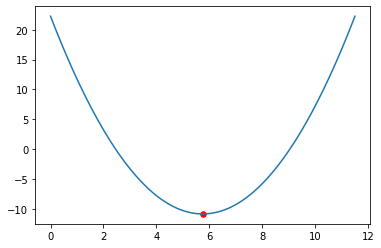

In [3]:
x = np.linspace(0,11.5,100)

y = f(x)

plt.plot(x,y)
# 最小值点。画为颜色红色
plt.scatter(5.75,f(5.75),color = 'red',s = 30)

#### 求这个方程的最小值

如果有方程，那么使用方程求导，非常方便！

In [ ]:
# 求导函数，令导函数为0，求解最小值对应的x值
# 2 * (x - 3.5) - 4.5
# 2*x - 11.5 = 0
# 2x = 11.5
# x = 5.75

#### 梯度下降（不能令方程的导函数为0，进行求解）

-----------------随机x是： 1
+++++++++++++++梯度下降次数： 13
[1.         3.85       4.99       5.446      5.6284     5.70136
 5.730544   5.7422176  5.74688704 5.74875482 5.74950193 5.74980077
 5.74992031 5.74996812]


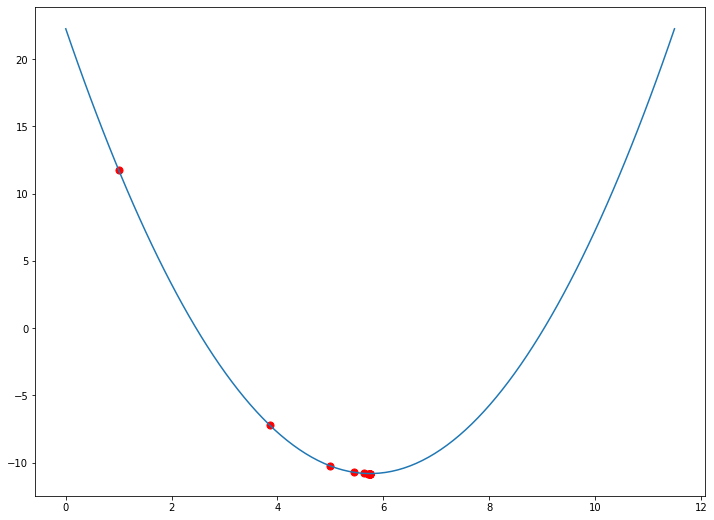

In [9]:
eta = 0.3 # 学习率

# 梯度下降5.749，就可以算是答案
# 5.7501
# 随机（瞎蒙）,初始值
x = np.random.randint(0,12,size = 1)[0]

# 多次while 循环，每次梯度下降，更新，记录一下上一次的值
# 比较，精确
# + 0.1；+ 0.2,；+ 1
# 一开始有差异，目的为了比较
last_x = x + 0.1

# 精确度
precision = 0.0001
print('-----------------随机x是：',x)

# 每次梯度下降，求解出来的x值，一开始随机给的
x_ = [x] # Python中列表
count = 0
while True:
    if np.abs(x - last_x) < precision: # 更新时，变化甚微，终止
        break
    # 更新，梯度下降
    # x是当前数值，赋值给上一个值
    last_x = x
    count += 1
    x = x - eta * g(x)
    x_.append(x)
#     print('+++++++++++++++更新之后的x是：',x)
print('+++++++++++++++梯度下降次数：',count)

# x1是NumPy数组
x1 = np.linspace(0,11.5,100)
y1 = f(x1)
plt.figure(figsize=(12,9))
plt.plot(x1,y1)

# 散点图
x_ = np.array(x_)
plt.scatter(x_, f(x_),color = 'red',s = 50)
print(x_)

### BGD批量梯度下降

#### 一元一次线性回归

In [10]:
import numpy as np

import matplotlib.pyplot as plt

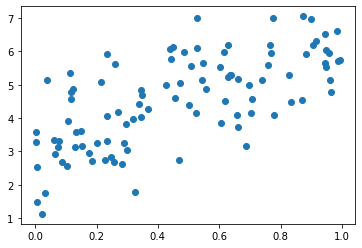

In [11]:
X = np.random.rand(100,1)

w,b = np.random.randint(1,10,size = 2)

# 增加“噪声”，更像真实数据，“加盐”
# 增加扰动！ 数据更加真实
# NumPy广播机制
y = w * X + b + np.random.randn(100,1)
plt.scatter(X,y)

# LinearRegression intercept_ == bias 一个意思：方程截距

In [12]:
# 将b作为偏置项，截距，对应的系数，理解为1
X = np.concatenate([X,np.full(shape  =(100,1),fill_value=1)],axis = 1)
X[:10]

array([[0.18663063, 1.        ],
       [0.96404053, 1.        ],
       [0.52653107, 1.        ],
       [0.98302958, 1.        ],
       [0.23429798, 1.        ],
       [0.90542619, 1.        ],
       [0.00744531, 1.        ],
       [0.15222157, 1.        ],
       [0.32446442, 1.        ],
       [0.2347172 , 1.        ]])

¥ 𝜃𝑛+1=𝜃𝑛−𝜂∗𝑋𝑇(𝑋𝜃−𝑦) ¥

In [13]:
# 循环次数
epoches = 10000

# 学习率
eta = 0.01
t0 = 5
t1 = 1000
# t 梯度下降的次数，逆时衰减，随着梯度下降次数增加，学习率，变小
def learning_rate_shedule(t):
    return t0/(t + t1) # lr = 5/1000 = 0.005

# 要求解的系数，随机数，赋值的，“瞎蒙”
theta = np.random.randn(2,1)

# 梯度下降次数
t = 0
for i in range(epoches):
    # 批量梯度下降，X矩阵，矩阵包含所有的数据
    g = X.T.dot(X.dot(theta) - y) # 根据公式计算的梯度
    eta = learning_rate_shedule(t) # 随着梯度下降次数增加，学习率下降
    theta = theta - eta * g
    t += 1
print('真实的斜率、截距是：',w,b)
print('BGD求解的斜率、截距是：',theta)

真实的斜率、截距是： 3 3
BGD求解的斜率、截距是： [[3.02190969]
 [3.12903143]]


#### 多元一次

In [14]:
X.shape
# 100表示100个方程，9表示系数

(100, 2)

In [15]:
import numpy as np

X = np.random.rand(100,8)

w = np.random.randint(1,10,size = (8,1))
b = np.random.randint(1,10,size = 1)

# 增加“噪声”，更像真实数据，“加盐”
# 增加扰动！ 数据更加真实
# NumPy广播机制
y = X.dot(w) + b + np.random.randn(100,1)

# 截距当成偏置项
X = np.concatenate([X,np.full(shape = (100,1),fill_value=1)],axis = 1)

# 循环次数
epoches = 10000

# 学习率
eta = 0.01
t0 = 5
t1 = 1000
# t 梯度下降的次数，逆时衰减，随着梯度下降次数增加，学习率，变小
def learning_rate_shedule(t):
    return t0/(t + t1) # lr = 5/1000 = 0.005

# 要求解的系数，随机数，赋值的，“瞎蒙”
theta = np.random.randn(9,1)

# 梯度下降次数
t = 0
for i in range(epoches):
    # 批量梯度下降，X矩阵，矩阵包含所有的数据
    g = X.T.dot(X.dot(theta) - y) # 根据公式计算的梯度
    eta = learning_rate_shedule(t) # 随着梯度下降次数增加，学习率下降
    theta = theta - eta * g
    t += 1
print('真实的斜率、截距是：',w,b)
print('BGD求解的斜率、截距是：',theta)

真实的斜率、截距是： [[2]
 [4]
 [9]
 [5]
 [7]
 [1]
 [5]
 [6]] [2]
BGD求解的斜率、截距是： [[1.14366671]
 [3.57554323]
 [8.72384389]
 [5.52634185]
 [7.96831744]
 [1.65502051]
 [4.87158442]
 [6.18060468]
 [1.62084368]]


### SGD随机梯度下降

#### 一元一次方程

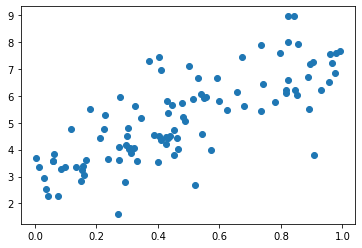

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 100样本！！！
X = np.random.rand(100,1)

w,b = np.random.randint(1,10,size = 2)

# 增加“噪声”，更像真实数据，“加盐”
# 增加扰动！ 数据更加真实
# NumPy广播机制
y = w * X + b + np.random.randn(100,1)
plt.scatter(X,y)

In [17]:
# 偏置，X也需要增加
X = np.concatenate([X,np.full_like(X,fill_value=1)],axis = 1)

In [20]:
X[:10]

array([[0.04367772, 1.        ],
       [0.22788126, 1.        ],
       [0.98007748, 1.        ],
       [0.32386886, 1.        ],
       [0.81578736, 1.        ],
       [0.15007144, 1.        ],
       [0.27706937, 1.        ],
       [0.8227916 , 1.        ],
       [0.46402952, 1.        ],
       [0.09638562, 1.        ]])

In [21]:
epoches = 100 # 循环100次

t0 = 5
t1 = 1000
# t 梯度下降的次数，逆时衰减，随着梯度下降次数增加，学习率，变小
def learning_rate_shedule(t):
    return t0/(t + t1) # lr = 5/1000 = 0.005

# 既有斜率（一个）、截距
theta = np.random.randn(2,1)

count = 0 # 表示训练次数
for t in range(epoches):
    index = np.arange(100) # 0,1,2,……，99
    np.random.shuffle(index) # 洗牌，打乱顺序
    # numpy花式索引
    X = X[index]
    y = y[index]
    for i in range(100):
        # 随机抽样！！！抽了一个样本
        X_i = X[[i]] # 两个[[]]
        y_i = y[[i]]
        
        # 根据这一个样本，进行计算梯度
        # 单个样本，依然是一个矩阵
        g = X_i.T.dot(X_i.dot(theta) - y_i)
        eta = learning_rate_shedule(count)
        count += 1
        theta -= 0.1 * g
print('真实的斜率、截距是：',w,b)
print('SGD求解的斜率、截距是：',theta)

真实的斜率、截距是： 4 3
SGD求解的斜率、截距是： [[4.39795856]
 [3.12596338]]


In [23]:
X[0]

array([0.00298494, 1.        ])

In [24]:
X[[0]]

array([[0.00298494, 1.        ]])

#### 多元一次方程

In [25]:
import numpy as np

X = np.random.rand(100,5)

w = np.random.randint(1,10,size = (5,1))
b = np.random.randint(1,10,size = 1)

# 增加“噪声”，更像真实数据，“加盐”
# 增加扰动！ 数据更加真实
# NumPy广播机制
y = X.dot(w) + b + np.random.randn(100,1)

# 截距当成偏置项
X = np.concatenate([X,np.full(shape = (100,1),fill_value=1)],axis = 1)


epoches = 1000 # 循环100次

t0 = 5
t1 = 1000
# t 梯度下降的次数，逆时衰减，随着梯度下降次数增加，学习率，变小
def learning_rate_shedule(t):
    return t0/(t + t1) # lr = 5/1000 = 0.005

# 既有斜率（5个 + 1个截距 = 6） 、截距
theta = np.random.randn(6,1)

count = 0 # 表示训练次数
for t in range(epoches):
    index = np.arange(100) # 0,1,2,……，99
    np.random.shuffle(index) # 洗牌，打乱顺序
    # numpy花式索引
    X = X[index]
    y = y[index]
    for i in range(100):
        # 随机抽样！！！抽了一个样本
        X_i = X[[i]] # 两个[[]]
        y_i = y[[i]]
        
        # 根据这一个样本，进行计算梯度
        # 单个样本，依然是一个矩阵
        g = X_i.T.dot(X_i.dot(theta) - y_i)
        eta = learning_rate_shedule(count)
        count += 1
        theta -= eta * g
print('真实的斜率、截距是：',w,b)
print('SGD求解的斜率、截距是：',theta)

真实的斜率、截距是： [[6]
 [8]
 [9]
 [8]
 [7]] [7]
SGD求解的斜率、截距是： [[5.71127968]
 [6.75137261]
 [8.85530932]
 [7.04842213]
 [6.13910598]
 [8.87798742]]


### MBGD小批量梯度下降

 #### 一元一次方程

In [26]:
import numpy as np

# 1、创建数据集X，y
X = np.random.rand(100, 1)
w,b = np.random.randint(1,10,size = 2)
y = w * X + b + np.random.randn(100, 1)

# 2、使用偏置项x_0 = 1，更新X
X = np.c_[X, np.ones((100, 1))]

# 3、定义一个函数来调整学习率
t0, t1 = 5, 500
def learning_rate_schedule(t):
    return t0/(t+t1)

# 4、创建超参数轮次、样本数量、小批量数量
epochs = 1000
n = 100
batch_size = 16
num_batches = int(n / batch_size) # 6次，6 * 16 = 96



# 5、初始化 W0...Wn，标准正太分布创建W，截距
θ = np.random.randn(2, 1)

# 6、多次for循环实现梯度下降，最终结果收敛
for epoch in range(epochs):
    # 在双层for循环之间，每个轮次开始分批次迭代之前打乱数据索引顺序
    index = np.arange(n)
    np.random.shuffle(index)
    X = X[index]
    y = y[index]
    for i in range(num_batches): # 6
        # 一次取一批数据16个样本
        # 切片
        X_batch = X[i * batch_size : (i + 1)*batch_size]
        y_batch = y[i * batch_size : (i + 1)*batch_size]
        
        g = X_batch.T.dot(X_batch.dot(θ)-y_batch)
        
        learning_rate = learning_rate_schedule(epoch * n + i)
        
        θ = θ - learning_rate * g

print('真实斜率和截距是：',w,b)
print('梯度下降计算斜率和截距是：',θ)

真实斜率和截距是： 4 1
梯度下降计算斜率和截距是： [[3.87563644]
 [1.42533796]]


#### 多元一次方程

In [27]:
import numpy as np

# 1、创建数据集X，y
X = np.random.rand(100, 3)
w = np.random.randint(1,10,size = (3,1))
b = np.random.randint(1,10,size = 1)
y = X.dot(w) + b + np.random.randn(100, 1)

# 2、使用偏置项 X_0 = 1，更新X
X = np.c_[X, np.ones((100, 1))]

# 3、定义一个函数来调整学习率
t0, t1 = 5, 500
def learning_rate_schedule(t):
    return t0/(t+t1)

# 4、创建超参数轮次、样本数量、小批量数量
epochs = 10000
n = 100
batch_size = 16
num_batches = int(n / batch_size)

# 5、初始化 W0...Wn，标准正太分布创建W
θ = np.random.randn(4, 1)

# 6、多次for循环实现梯度下降，最终结果收敛
for epoch in range(epochs):
    # 在双层for循环之间，每个轮次开始分批次迭代之前打乱数据索引顺序
    index = np.arange(n)
    np.random.shuffle(index)
    X = X[index]
    y = y[index]
    for i in range(num_batches):
        # 一次取一批数据16个样本
        X_batch = X[i * batch_size : (i + 1)*batch_size]
        y_batch = y[i * batch_size : (i + 1)*batch_size]
        g = X_batch.T.dot(X_batch.dot(θ)-y_batch)
        learning_rate = learning_rate_schedule(epoch * n + i)
        θ = θ - learning_rate * g

print('真实斜率和截距是：',w,b)
print('梯度下降计算斜率和截距是：',θ)

真实斜率和截距是： [[4]
 [4]
 [6]] [5]
梯度下降计算斜率和截距是： [[4.16316486]
 [3.96018456]
 [6.36094868]
 [4.66120044]]


In [28]:
X

array([[6.28480183e-01, 8.33982841e-01, 4.62976334e-01, 1.00000000e+00],
       [1.46820219e-01, 5.47017308e-02, 6.57090638e-01, 1.00000000e+00],
       [2.73496299e-01, 7.76679988e-01, 2.15729317e-01, 1.00000000e+00],
       [5.14369346e-01, 7.63409381e-01, 2.97275692e-01, 1.00000000e+00],
       [7.66513533e-01, 4.95135375e-01, 8.16405481e-01, 1.00000000e+00],
       [1.40272584e-01, 1.29064476e-01, 9.03072736e-01, 1.00000000e+00],
       [5.62569553e-01, 1.82734772e-03, 6.01563282e-01, 1.00000000e+00],
       [9.30924409e-01, 8.76401241e-02, 6.29994789e-01, 1.00000000e+00],
       [2.58175914e-01, 9.57800300e-01, 6.26884413e-01, 1.00000000e+00],
       [3.63613736e-01, 4.35079193e-01, 8.23753893e-01, 1.00000000e+00],
       [7.73034960e-01, 2.51039286e-01, 3.21921829e-01, 1.00000000e+00],
       [9.28964577e-01, 2.38032381e-01, 6.57211349e-01, 1.00000000e+00],
       [6.90788267e-01, 3.16008955e-01, 3.02734114e-01, 1.00000000e+00],
       [9.85020609e-01, 8.43111081e-01, 3.32798231e

In [29]:
np.c_[X, np.ones((100, 1))]

array([[6.28480183e-01, 8.33982841e-01, 4.62976334e-01, 1.00000000e+00,
        1.00000000e+00],
       [1.46820219e-01, 5.47017308e-02, 6.57090638e-01, 1.00000000e+00,
        1.00000000e+00],
       [2.73496299e-01, 7.76679988e-01, 2.15729317e-01, 1.00000000e+00,
        1.00000000e+00],
       [5.14369346e-01, 7.63409381e-01, 2.97275692e-01, 1.00000000e+00,
        1.00000000e+00],
       [7.66513533e-01, 4.95135375e-01, 8.16405481e-01, 1.00000000e+00,
        1.00000000e+00],
       [1.40272584e-01, 1.29064476e-01, 9.03072736e-01, 1.00000000e+00,
        1.00000000e+00],
       [5.62569553e-01, 1.82734772e-03, 6.01563282e-01, 1.00000000e+00,
        1.00000000e+00],
       [9.30924409e-01, 8.76401241e-02, 6.29994789e-01, 1.00000000e+00,
        1.00000000e+00],
       [2.58175914e-01, 9.57800300e-01, 6.26884413e-01, 1.00000000e+00,
        1.00000000e+00],
       [3.63613736e-01, 4.35079193e-01, 8.23753893e-01, 1.00000000e+00,
        1.00000000e+00],
       [7.73034960e-01, 2.5103

结束